In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [3]:
target_list = []
r1_timestamps, r1_ranges, r1_azimuths, r1_elevations = [], [], [], []

In [4]:
with open('sample_move.txt', 'r') as f:
    # 毎行読み込むので、ほしい値を直接読み込む形式に
    for s_line in f.readlines():
        # マッチングさせる文字列を定義
        ## タイムスタンプ形式ではない？仕様がわからないので、保留
        r1_timestamp_match_str = "\'mach cont time (sec)\': "
        r1_range_match_str = "\'r1 range (m)\': " # 直線距離
        r1_azimuth_match_str = "\'r1 azimuth PDOA (deg)\': " # 方位角
        r1_elevation_match_str = "\'r1 elevation PDOA (deg)\': " # 標高の角度

        # 文字列がマッチングした際に、対応するリストに格納
        if r1_timestamp_match_str in s_line:
            r1_timestamps.append(s_line.split(r1_timestamp_match_str)[1].strip(",\n"))
        if r1_range_match_str in s_line:
            r1_ranges.append(s_line.split(r1_range_match_str)[1].strip(",\n"))      
        if r1_azimuth_match_str in s_line:
            r1_azimuths.append(s_line.split(r1_azimuth_match_str)[1].strip(",\n"))
        if r1_elevation_match_str in s_line:
            r1_elevations.append(s_line.split(r1_elevation_match_str)[1].strip(",\n"))

In [5]:
# 確認用
## 2回に1回、r1_azimuthとr1_elevationがinvalidになる
# for r1_range, r1_azimuth, r1_elevation in zip(r1_ranges, r1_azimuths, r1_elevations):
#     print(f"{r1_range}, {r1_azimuth}, {r1_elevation}")

In [6]:
target = list(zip(r1_ranges, r1_azimuths, r1_elevations))
target_df = pd.DataFrame(target, columns=["range", "azimuth", "elevation"])

In [7]:
tmp_df = pd.DataFrame(target, columns=["range", "azimuth", "elevation"])
tmp_df.head()

,range,azimuth,elevation
0,1.15305,invalid,invalid
1,1.06897,-25.000000,-30.000000
2,1.06447,invalid,invalid
3,0.969581,-173.000000,98.000000
4,0.967479,invalid,invalid


In [8]:
# invalidとなる値を除く
target_df = target_df[(target_df["azimuth"]!="invalid")|(target_df["elevation"]!="invalid")].reset_index(drop=True)
# floatに変換
target_df["range"] = target_df["range"].astype(float)
target_df["azimuth"] = target_df["azimuth"].astype(float).mod(360)
target_df["elevation"] = target_df["elevation"].astype(float).mod(360)

In [9]:
target_df["azimuth"]

0      335.0
1      187.0
2      239.0
3      260.0
4      277.0
       ...  
110    140.0
111    141.0
112    140.0
113    137.0
114    138.0
Name: azimuth, Length: 115, dtype: float64

In [10]:
# 確認用
# target_df["range"].plot()
# target_df["azimuth"].plot()
# target_df["elevation"].plot()

In [11]:
# 3次元極座標の変換
# https://manabitimes.jp/math/1235
target_df["pos_x"] = target_df["range"] * np.sin(target_df["azimuth"]) * np.cos(target_df["elevation"])
target_df["pos_y"] = target_df["range"] * np.sin(target_df["azimuth"]) * np.sin(target_df["elevation"])
target_df["pos_z"] = target_df["range"] * np.cos(target_df["azimuth"])

In [12]:
target_df.head()

,range,azimuth,elevation,pos_x,pos_y,pos_z
0,1.068970,335.0,330.0,-0.967309,-0.129191,-0.436257
1,0.969581,187.0,98.0,0.792119,0.554367,0.072880
2,1.183980,239.0,205.0,-0.195950,-0.200341,1.150337
3,1.122720,260.0,245.0,0.766337,-0.033915,-0.819804
4,1.109810,277.0,245.0,0.569889,-0.025221,0.951981


In [13]:
# fig = plt.figure(figsize = (8, 8))
# ax= fig.add_subplot(111, projection='3d')
# ax.scatter(target_df["pos_x"],target_df["pos_y"],target_df["pos_z"], s = 1, c = "blue")
# plt.show()

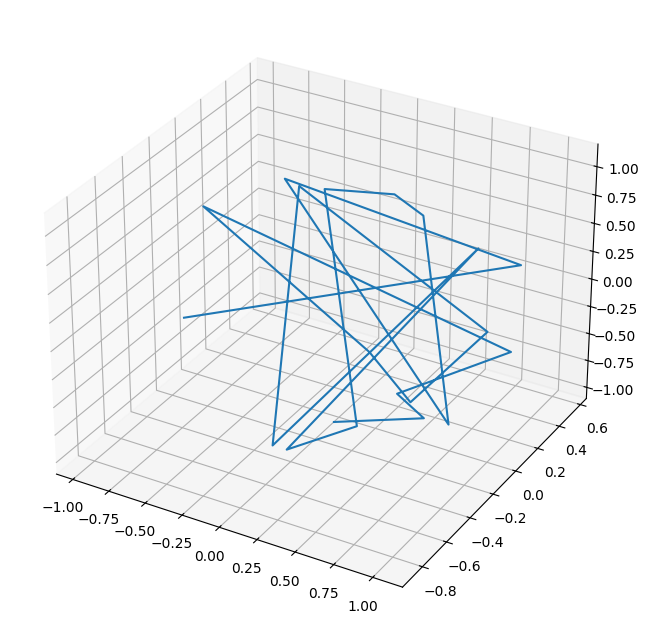

In [14]:
draw_point = 20

fig = plt.figure(figsize = (8, 8))
ax= fig.add_subplot(111, projection='3d')
ax.plot(target_df["pos_x"].iloc[:draw_point],target_df["pos_y"].iloc[:draw_point],target_df["pos_z"].iloc[:draw_point])
# ax.plot(target_df["pos_x"],target_df["pos_y"],target_df["pos_z"])
plt.savefig("sample_move.png")
plt.show()